In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.optimizers import Adam

# ---------------- Task 1: Image Compression ----------------

def compress_image(image_path):
    image = Image.open(image_path)

    # Lossy compression (JPEG)
    jpeg_path = "compressed_image.jpg"
    image.save(jpeg_path, "JPEG", quality=20)

    # Lossless compression (PNG)
    png_path = "compressed_image.png"
    image.save(png_path, "PNG", optimize=True)

    # Compare file sizes
    original_size = os.path.getsize(image_path)
    jpeg_size = os.path.getsize(jpeg_path)
    png_size = os.path.getsize(png_path)

    print(f"Original Image Size: {original_size / 1024:.2f} KB")
    print(f"JPEG Compressed Size: {jpeg_size / 1024:.2f} KB")
    print(f"PNG Compressed Size: {png_size / 1024:.2f} KB")

    return jpeg_path, png_path


In [2]:
# ---------------- Task 2: CNN on MNIST and CIFAR-10 ----------------

def create_cnn(input_shape, num_classes):
    """Builds a simple CNN model"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluates CNN performance"""
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC & AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    return accuracy, precision, recall, f1

def train_cnn(dataset="mnist"):
    """Trains CNN on MNIST or CIFAR-10 dataset"""
    if dataset == "mnist":
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize
        X_train = X_train.reshape(-1, 28, 28, 1)
        X_test = X_test.reshape(-1, 28, 28, 1)
        num_classes = 10
        input_shape = (28, 28, 1)
    elif dataset == "cifar10":
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
        X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize
        num_classes = 10
        input_shape = (32, 32, 3)

    # One-hot encoding
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # 80-20 Split
    split = int(0.8 * len(X_train))
    X_train, X_valid = X_train[:split], X_train[split:]
    y_train, y_valid = y_train[:split], y_train[split:]

    # Train CNN
    model = create_cnn(input_shape, num_classes)
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=64)

    # Evaluate CNN
    return evaluate_model(model, X_test, y_test)

Original Image Size: 8.83 KB
JPEG Compressed Size: 4.83 KB
PNG Compressed Size: 94.26 KB

Training CNN on MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8092 - loss: 0.5924 - val_accuracy: 0.9797 - val_loss: 0.0679
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9695 - loss: 0.1004 - val_accuracy: 0.9868 - val_loss: 0.0482
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9791 - loss: 0.0702 - val_accuracy: 0.9875 - val_loss: 0.0425
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0526 - val_accuracy: 0.9883 - val_loss: 0.0413
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9890 - val_loss: 0.0363
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9885 - loss: 0.0379 - val_accuracy: 0.9907 - val_loss: 0.0330
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9894 - loss: 0.0330 - val_accuracy: 0.9886 - val_loss: 0.0391
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0313 - val_accuracy: 0.

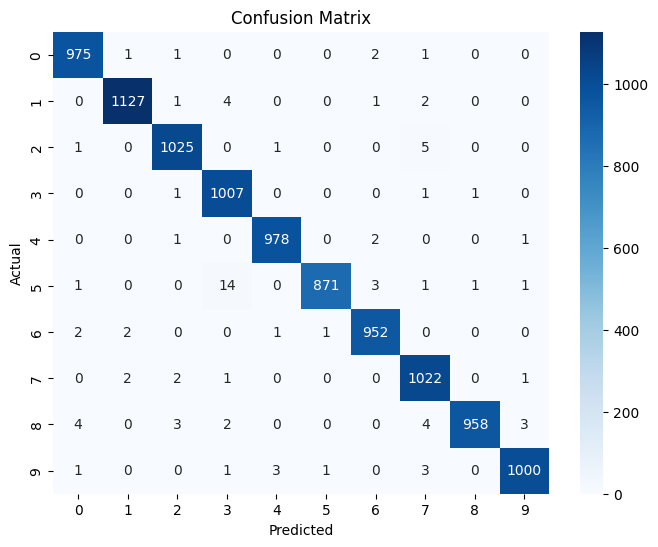

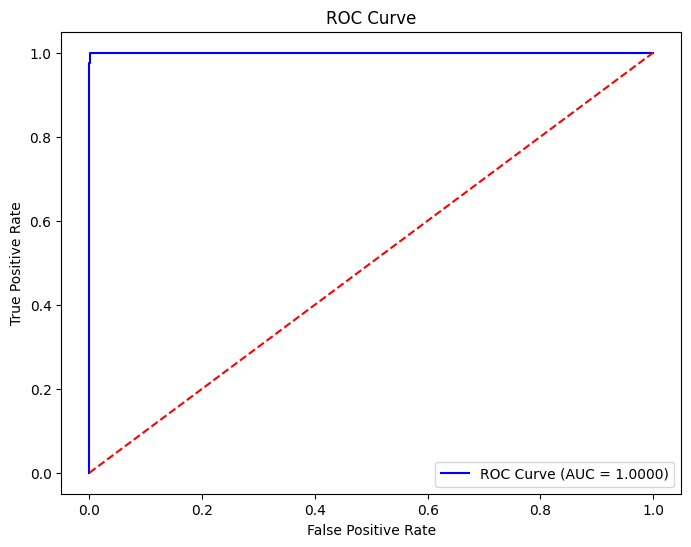


Training CNN on CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2889 - loss: 1.9173 - val_accuracy: 0.4991 - val_loss: 1.3842
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4898 - loss: 1.4202 - val_accuracy: 0.5748 - val_loss: 1.2194
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5521 - loss: 1.2692 - val_accuracy: 0.6122 - val_loss: 1.1229
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5900 - loss: 1.1686 - val_accuracy: 0.6320 - val_loss: 1.0643
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6097 - loss: 1.1160 - val_accuracy: 0.6437 - val_loss: 1.0206
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6232 - loss: 1.0522 - val_accuracy: 0.6645 - val_loss: 0.9624
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6479 - loss: 0.9990 - val_accuracy: 0.6565 - val_loss: 0.9824
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6577 - loss: 0.9673 - val_accuracy: 0.

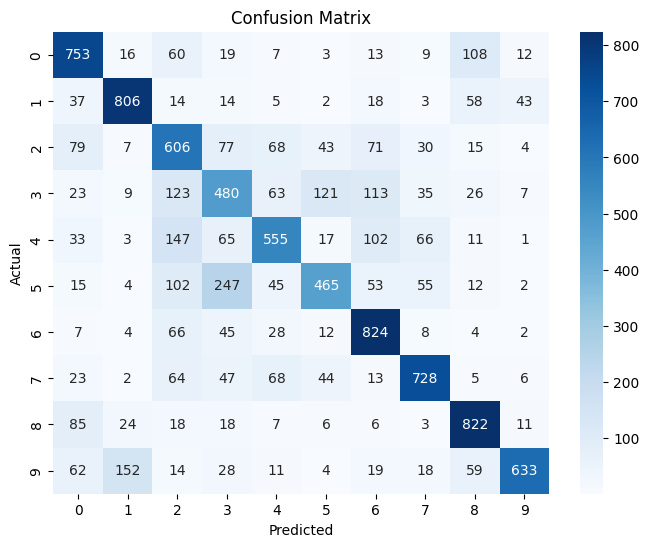

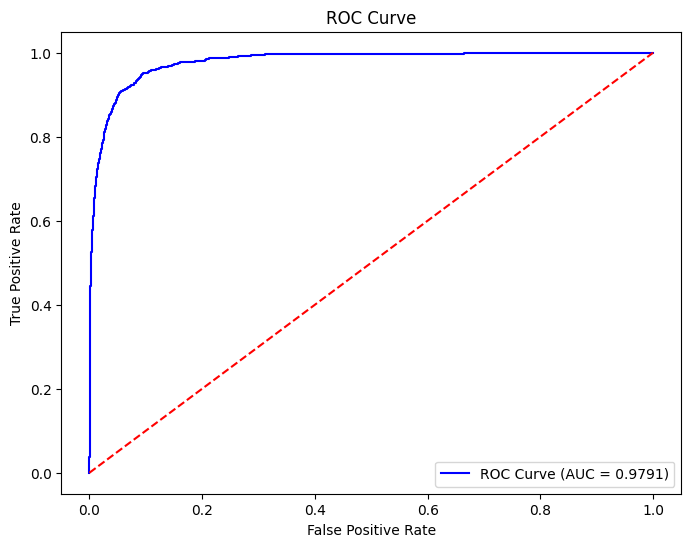

In [5]:
# ---------------- Running Both Tasks ----------------

if __name__ == "__main__":
    # Task 1: Compress Image
    image_path = "/content/sample_data/images.jpg"  # Replace with actual path
    jpeg_compressed, png_compressed = compress_image(image_path)

    # Task 2: CNN on MNIST
    print("\nTraining CNN on MNIST...")
    mnist_results = train_cnn("mnist")

    # Task 2: CNN on CIFAR-10
    print("\nTraining CNN on CIFAR-10...")
    cifar_results = train_cnn("cifar10")
